In [1]:
#build setup
import numpy as np
from scipy.optimize import *
from scipy.integrate import *
import matplotlib.pyplot as plt
import math

## Problem Set 5 #2:
This problem examines the biological oscillator which is modelled by the following coupled set of ODEs

$$\frac{dc_a}{dt}= -d_a c_a + \frac{r_{oa}+r_a c_a^2}{1+c_a ^2 + c_r ^2} \hspace{20mm}(1) $$

$$\frac{dc_r}{dt}=-c_r + \frac{r_{or}+r_r c_a^2}{1+c_a^2} \hspace{20mm} (2) $$

These ODEs have two relevant terms on the right hand side, the first of which is degradation which depends only on a rate constant and the concentration of the species.  The next term represents the production of the given species and is further analyzed in part A.

### Part A.)  

As can be seen in (1), $c_r$ appears in the denominator of a positive term.  Increasing $c_r$ causes the production term to decrease. Thus, $\fbox{R is an inhibitor of A}$.  Similarly, in (2), $c_r$ only appears in the degradation term, and has no effect in the production term. Thus, $\fbox{R has no effect on the production R}$.


In both (1) and (2), $c_a$ takes the form in the production term of $\frac{\alpha + c_a^2}{\beta + c_a^2}$ for some $\alpha, \beta$. This form represents is that of an activator so, $\fbox{A activates production of both A and R}$.


To find the basal rates of A and R production, we consider the production terms of (1) and (2).  As shown previously, A is an activator of both A and R, so we can expect basal rates to occur when $c_a$ is very small (or even 0).  Taking these limits, we find the basal rate for (1) is $\fbox{$\frac{dc_a}{dt}= r_{oa}$}$.  Now, examining (2), we find the basal rate to be $\fbox{$\frac{dc_r}{dt}=r_{or}$}$.


For maximal rates of A and R production, we use the same reasoning considering the production terms of (1) and (2).  Given that A is an activator of both A and R, we expect the maximal rate to occur at high $c_a$.  Thus, we expect $c_a >> 1, r_{oa}, c_r, r_{or}$.  As such, we find the maximal rates to be $\fbox{$\frac{dc_a}{dt}=r_a$}$ and $\fbox{$\frac{dc_r}{dt}=r_r$}$




### Part B.)

To generate the nullclines, we set both derivatives in (1) and (2) equal to zero:

$$ 0= -d_a c_a + \frac{r_{oa}+r_a c_a^2}{1+c_a ^2 + c_r ^2}$$

$$ 0= -c_r + \frac{r_{or}+r_r c_a^2}{1+c_a^2}$$

From here, we easily obtain tuples of values $(c_a,c_r)$ that satisfy these equations.  These are nullclines and plotted on the phase portrait below.  As we can see in the plot below, the two nullclines intersect at a value around

In [2]:
# generate nullcline for part b

#nullcline for dcr/dt
m=201; ror=1; rr=100; roa=100; ra=5000; da=30;
c_a=np.linspace(0.01,200,m)
c_r1=(ror+rr*np.power(c_a,2))/(1+np.power(c_a,2))

#nullcline for dca/dt
c_r2= np.sqrt((roa+ra*np.power(c_a,2))/(da*c_a)-1-np.power(c_a,2))

#nullclines are plotted on same graph as part c below


#creates system of coupled ODEs (includes optional parameter t for when using odeint)
def vectorfield2(w,t=np.linspace(0,20,201)):
    """
    Defines the differential equations for coupled concentrations of ca and cr
    Arguments:
        w :  vector of the state variables:
                  w = [ca,cr]
        t :  time        
    """
    ca, cr = w
    ror=1; rr=100; roa=100; ra=5000; da=30;

    # Create f = (ca', cr'):
    f = [(-da*ca)+(roa+ra*math.pow(ca,2))/(1+ca*ca+math.pow(cr,2)),-cr+(ror+rr*math.pow(ca,2))/(1+math.pow(ca,2))]
    return f

ca_eq,cr_eq=fsolve(vectorfield2,([1,1]))
print(ca_eq,cr_eq)

#ignore this runtime warning, its still fastest to vectorize even if in implementation it is slow for vectorized standards
#due to dividing by very small value in numpy array

0.2640870637696447 7.454318793339845


<ipython-input-2-8ccc2d3e288a>:9: RuntimeWarning: invalid value encountered in sqrt
  c_r2= np.sqrt((roa+ra*np.power(c_a,2))/(da*c_a)-1-np.power(c_a,2))


As can be seen above, the intersection of the two nullclines occurs at $c_a = 0.264$ and $c_r = 7.453$.  To test the stability of this, a second phase plot is shown generated directly around this fixed point.

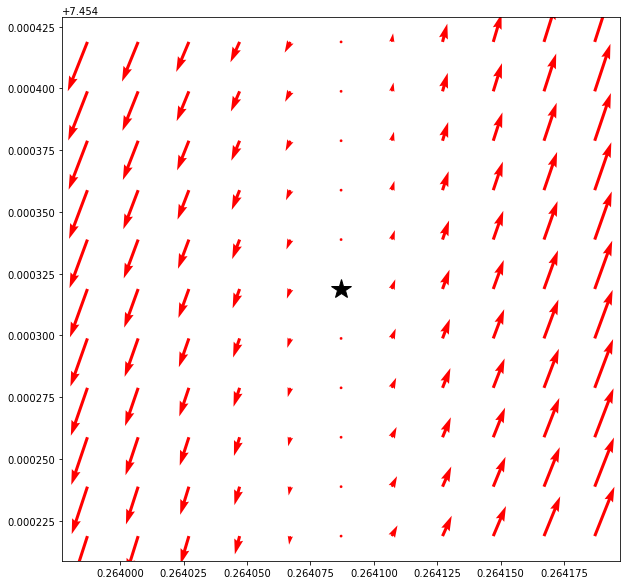

In [3]:
#phase plot insert for testing stability 
n=11
delta=0.0001
t = np.linspace(0,20,201)
caVector=np.linspace(ca_eq-delta,ca_eq+delta,n)
crVector=np.linspace(cr_eq-delta,cr_eq+delta,n)
#generate mesh
meshCA,meshCR=np.meshgrid(caVector,crVector)
dCAdt,dCRdt=np.zeros(meshCA.shape),np.zeros(meshCR.shape)
#iterate through values of Ca, Cr
for i in range(n):
    for j in range(n):
        localCA=meshCA[i,j]
        localCR=meshCR[i,j]
        deriv=vectorfield2([localCA,localCR],t)
        dCAdt[i,j]=deriv[0]
        dCRdt[i,j]=deriv[1]

#plotting
plt.rcParams["figure.figsize"] = (10,10) 
plt.rcParams.update({'font.size': 10})
Q=plt.quiver(meshCA,meshCR,dCAdt,dCRdt,color='r');
plt.plot(ca_eq,cr_eq,'k*',markersize=20);


## Part B, continued.)

As can be seen in this small subset of the phase plot around the fixed point, the contours move away from the fixed point, indicating it is unstable.  

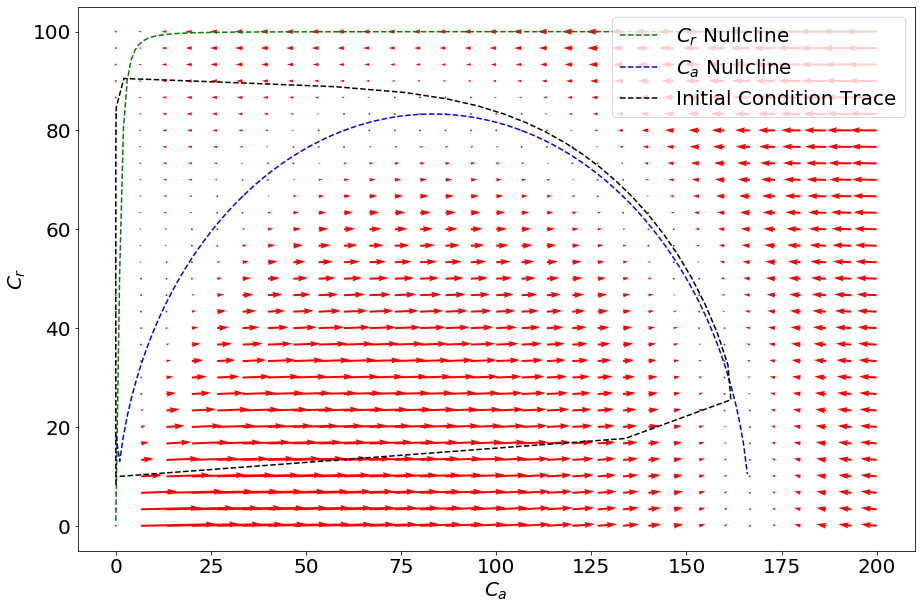

In [4]:
#PSET 5 Problem 2
#note that part b and c are plotted together

#phase plot for part c
n=31
t = np.linspace(0,20,201)
caVector=np.linspace(0,200,n)
crVector=np.linspace(0,100,n)
#generate mesh
meshCA,meshCR=np.meshgrid(caVector,crVector)
dCAdt,dCRdt=np.zeros(meshCA.shape),np.zeros(meshCR.shape)
#iterate through values of Ca, Cr
for i in range(n):
    for j in range(n):
        localCA=meshCA[i,j]
        localCR=meshCR[i,j]
        deriv=vectorfield2([localCA,localCR],t)
        dCAdt[i,j]=deriv[0]
        dCRdt[i,j]=deriv[1]


#Solving system for part e (and also intiial condition trace on plot)
#initial conditions
ca=1; cr=10;
w0 = [ca, cr]
#sovle system
solution = odeint(vectorfield2,w0,t)
ca = solution[:,0]
caLowTime = ca[0:50] #don't plot multiple loops over and over again
cr = solution[:,1]
crLowTime = cr[0:50]

#plotting
plt.rcParams["figure.figsize"] = (15,10) 
plt.rcParams.update({'font.size': 20})
Q=plt.quiver(meshCA,meshCR,dCAdt,dCRdt,color='r');

plt.plot(c_a,c_r1,'g--',label='$C_r$ Nullcline');
plt.plot(c_a,c_r2,'b--',label='$C_a$ Nullcline');
plt.plot(caLowTime,crLowTime,'k--',label= 'Initial Condition Trace');
plt.xlabel('$C_a$');
plt.ylabel('$C_r$');
plt.legend(loc='upper right');

#we choose to use arrows to represent magnitude to give a better qualitative understanding of the system

### Part D:  

As can be seen in the figure above, when both concentrations are low initially, $C_a$ is rapidly produced at which point $C_r$ is slowly produced, arcing upwards and $C_a$ graudally decreases.  It continues travelling this loop (black dashed line) counter-clockwise.  As can see by the magnitude of the arrows on the 'lower' portion of the loop, the increase of $c_a$ occurs very rapidly compared to the subsequent increase in $c_r$.  This is affirmed by the concentration vs time plot in part e below.

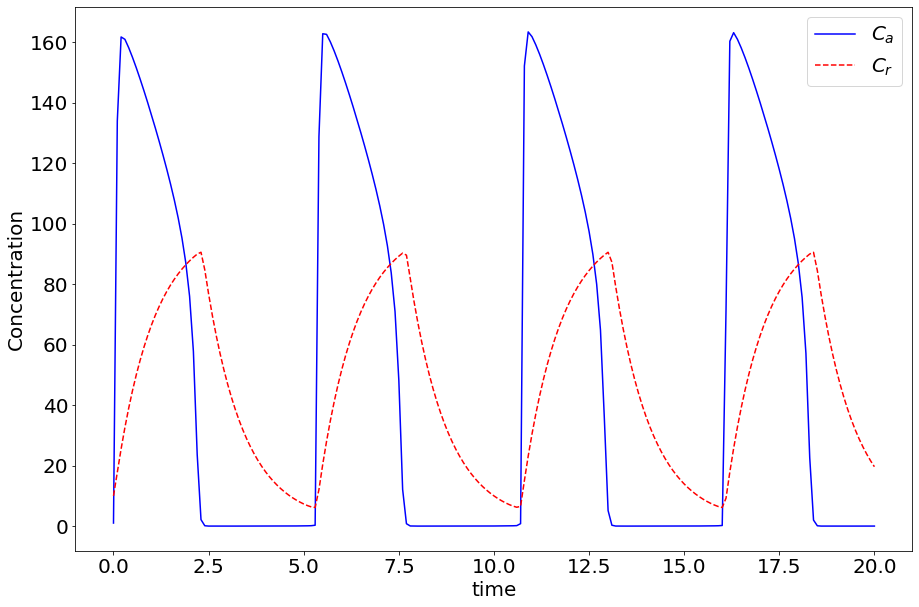

In [5]:
#plot for part e (solution was computed in above block)

#plotting against time
plt.plot(t,ca,'b-',label=r'$C_a$')
plt.plot(t,cr,'r--',label=r'$C_r$')
plt.ylabel('Concentration')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

The Runnable Code can be found on GITHUB at the following link: https://github.com/gbatsimm/CHEME_5440_PS5
